In [51]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
data=pd.read_csv(r"mcdonalds.csv")

In [53]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [54]:
data.shape

(1453, 15)

In [55]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [56]:
data.replace("Yes",1,inplace=True)
data.replace("No",0,inplace=True)

In [57]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male


### EXPLORING DATA


##### Customer segmentation - based on socio-demographs (Age & Gender)

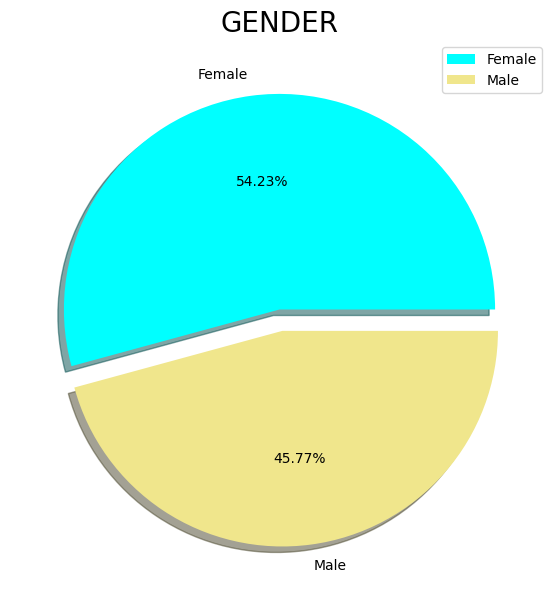

In [58]:
labels=['Female','Male']
size=data.Gender.value_counts()
colors=['aqua','khaki']
plt.rcParams['figure.figsize']=(7,7)
plt.pie(size,colors=colors,explode = [0, 0.1],labels=labels,shadow=True,autopct='%.2f%%')
plt.title('GENDER',fontsize=20)
plt.axis('off')
plt.legend()

In [59]:
#we infer that there are more female customers than male.


<AxesSubplot: xlabel='Age', ylabel='count'>

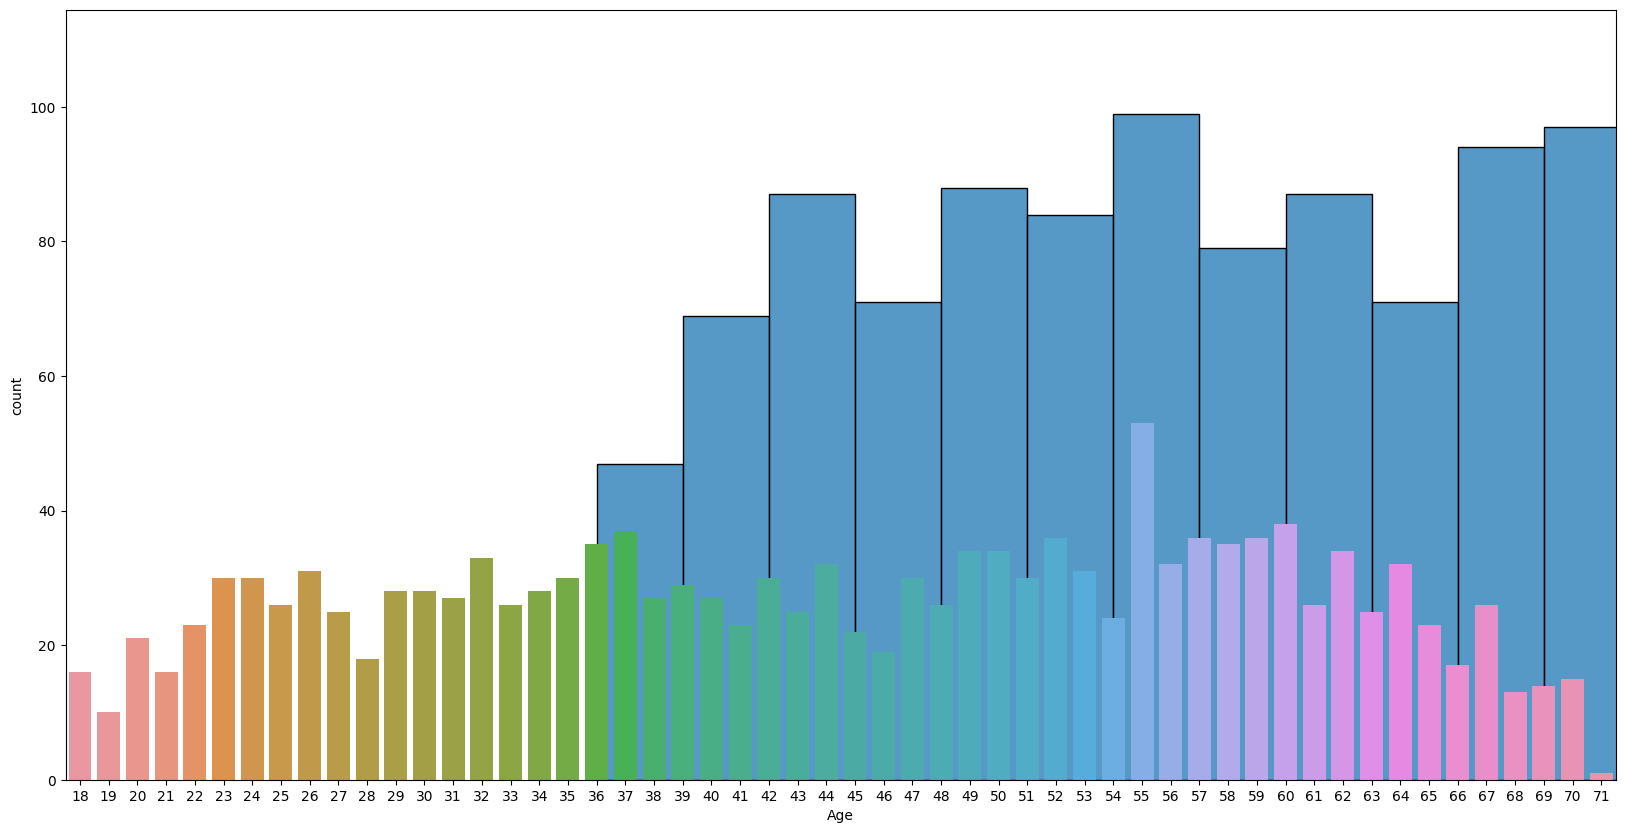

In [60]:
#AGE
plt.figure(figsize=(20,10))
sns.histplot(data.Age,binwidth=3)
sns.countplot(x=data.Age)


In [61]:
# Mcdonalds recieve more customers of age between 50-60 and 35-40.

In [62]:
Md_x=data.iloc[:,0:11]

In [63]:
Md_x.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [64]:
from sklearn.decomposition import PCA

In [65]:
pca=PCA()
pca_d=pca.fit_transform(Md_x)

In [66]:
pd.DataFrame(pca_d,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6',
                            'PCA7','PCA8','PCA9','PCA10','PCA11',])

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [67]:
var=pca.explained_variance_ratio_
var

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [68]:
import numpy as np

In [69]:
cummulative=np.cumsum(var)
cummulative

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

Results from principal components analysis indicate that the first two components
capture about 50% of the information contained in the segmentation variables. 

In [70]:
loadings=pca.components_
num_pc=pca.n_features_
pc_list=["PC"+str(i) for i in list(range(1,num_pc+1))]
loadings_df=pd.DataFrame.from_dict(dict(zip(pc_list,loadings)))
loadings_df['variable']=Md_x.columns.values
loadings_df=loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


In [71]:
Md_x.columns.values

array(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype=object)

In [72]:
new_pca=PCA(n_components=2)
comp=new_pca.fit_transform(Md_x)
comp

array([[ 0.42536706, -0.21907878],
       [-0.21863768,  0.38818996],
       [ 0.37541475,  0.73043507],
       ...,
       [-0.18589445,  1.06266156],
       [-1.18206441, -0.03856977],
       [ 1.55024186,  0.27503101]])

In [73]:
from bioinfokit.visuz import cluster

In [74]:
pd.DataFrame(comp)

,0,1
0,0.425367,-0.219079
1,-0.218638,0.388190
2,0.375415,0.730435
3,-0.172926,-0.352752
4,0.187057,-0.807610
...,...,...
1448,1.550242,0.275031
1449,-0.957339,0.014308
1450,-0.185894,1.062662
1451,-1.182064,-0.038570


In [75]:
import matplotlib.pyplot as plt
import plotly.express as px


In [76]:
plt.figure(figsize=(20,10))
fig=px.scatter(comp,x=0,y=1)
fig.show()

<Figure size 2000x1000 with 0 Axes>

### Step 5: Extracting Segments

In [77]:
from sklearn.cluster import KMeans

In [78]:
kmeans=KMeans(n_clusters=4,max_iter=50)

In [79]:
kmeans.fit(Md_x)

KMeans(max_iter=50, n_clusters=4)

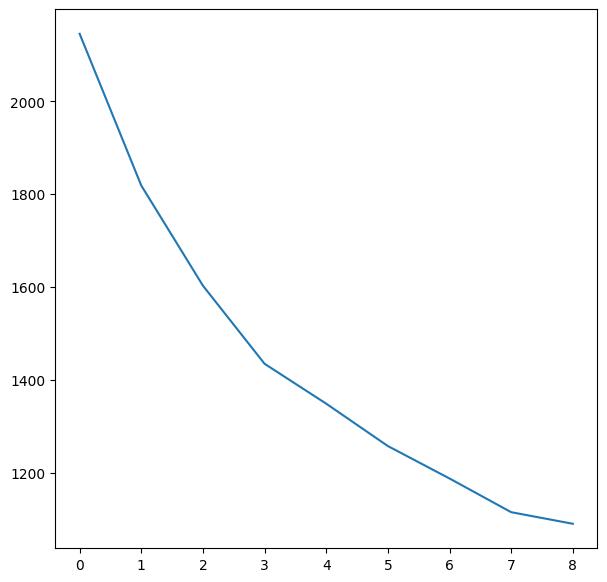

In [80]:
km=[]
r_clusters=[2,3,4,5,6,7,8,9,10]
for i in r_clusters:
    kmeans=KMeans(n_clusters=i,max_iter=50)
    kmeans.fit(Md_x)
    km.append(kmeans.inertia_)
plt.plot(km)  


In [81]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(Md_x)

KMeans(max_iter=50, n_clusters=3)

In [82]:
data_predict=kmeans.predict(Md_x)

In [83]:
kmeans.labels_

array([2, 1, 1, ..., 1, 0, 2])

In [88]:
labels=kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels=sum(y==labels)

NameError: name 'y' is not defined

In [85]:
# Fit Gaussian mixture models for different number of components (2 to 8)
from sklearn.mixture import GaussianMixture
k_values = range(2, 9)
models = []
for k in k_values:
    model = GaussianMixture(n_components=k)
    model.fit(MD_x)
    models.append(model)

# Print the fitted mixture models
for i, model in enumerate(models):
    print(f"Model {i+2}:")
    print(model)

NameError: name 'MD_x' is not defined

In [ ]:
AIC = [model.aic(MD_x) for model in models]
BIC = [model.bic(MD_x) for model in models]
ICL = [model.lower_bound_ for model in models]
plt.plot(k_values, AIC, label="AIC")
plt.plot(k_values, BIC, label="BIC")
plt.plot(k_values, ICL, label="ICL")
plt.ylabel("Value of information criteria")
plt.xlabel("Number of components")
plt.legend()
plt.show()